In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Using TensorFlow backend.


In [2]:
df = pd.read_csv('Amreli NRM data for model building1.csv')
# campaign = np.unique(df['campaign'])

# for c in campaign:
#     dfc = df[df['campaign']==c]
#     i = dfc.index[0]
#     df = df.drop(i)
df = df[df['Heat number (life number)']>1]    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)


In [5]:
df['Efficiency (MT/KWH)']

0      0.001500
1      0.001582
2      0.001628
3      0.001568
4      0.001669
         ...   
435    0.001602
436    0.001685
437    0.001637
438    0.001575
439    0.001590
Name: Efficiency (MT/KWH), Length: 440, dtype: float64

In [3]:
df.columns

Index(['campaign', 'Heat number (life number)',
       'Total Heat Time previous (minutes)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy previous (KWH)', 'Input energy (KWH)', 'Previous Voltage',
       'Previous Frequency', 'Previous Rating of the Furnace', 'Voltage',
       'Frequency', 'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Number of capacitors removed',
       'Refractory lining before heating', 'Refractory lining after heating'],
      dtype='object')

# Model 5: All inputs and All outputs 

In [6]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage', 'Total Heat Time previous (minutes)',
                 'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating','Number of capacitors removed','Tapping Temperature (C)','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)','Total Heat Time (minutes)','Voltage','Frequency','Refractory lining after heating']

# input_columns = ['Input (MT)','Previous Voltage', 
#                  'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating','Tapping Temperature (C)']
# output_columns = ['Efficiency (MT/KWH)','Total Heat Time (minutes)','Voltage','Frequency','Refractory lining after heating']

In [7]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

In [8]:
X_train.shape

(318, 12)

In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()

normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [10]:
## Keras NN
## model = Sequential()
n_input = X_train.shape[1] # number of features
n_hidden_1 = 500
n_hidden_2 = 100
n_hidden_3 = 50
n_hidden_4 = 150
n_hidden_5 = 100
n_hidden_6 = 50
n_hidden_7 = 25
num_digits = 5
n_output = 5

Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu')(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
# x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
# x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
# x = Dense(n_hidden_6, activation='relu', name = "Hidden_Layer_6")(x)
# x = Dense(n_hidden_7, activation='relu', name = "Hidden_Layer_7")(x)

output = Dense(num_digits, activation='linear', name = "Output_Layer")(x)
    
model = Model(Inp, output)
model.summary() 
learning_rate = 0.001
training_epochs = 500
batch_size = 5
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer='adam',
                  metrics=['mse'])
    
history = model.fit(normalized_X_train, normalized_y_train,
                         batch_size = batch_size,
                         epochs = training_epochs,
                         verbose = 2)


pred_train = model.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense (Dense)                (None, 500)               6500      
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               50100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 50)                5050      
_________________________________________________________________
Output_Layer (Dense)         (None, 5)                 255       
Total params: 61,905
Trainable params: 61,905
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
64/64 - 0s - loss: 0.0287 - mse: 0.0287
Epoch 2/500
64/64 - 0s - loss: 0.0068 - mse: 0.0068
Epoch 3/500


Epoch 136/500
64/64 - 0s - loss: 0.0025 - mse: 0.0025
Epoch 137/500
64/64 - 0s - loss: 0.0024 - mse: 0.0024
Epoch 138/500
64/64 - 0s - loss: 0.0022 - mse: 0.0022
Epoch 139/500
64/64 - 0s - loss: 0.0022 - mse: 0.0022
Epoch 140/500
64/64 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 141/500
64/64 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 142/500
64/64 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 143/500
64/64 - 0s - loss: 0.0022 - mse: 0.0022
Epoch 144/500
64/64 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 145/500
64/64 - 0s - loss: 0.0023 - mse: 0.0023
Epoch 146/500
64/64 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 147/500
64/64 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 148/500
64/64 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 149/500
64/64 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 150/500
64/64 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 151/500
64/64 - 0s - loss: 0.0022 - mse: 0.0022
Epoch 152/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 153/500
64/64 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 154/500
64/64 - 0s - l

Epoch 288/500
64/64 - 0s - loss: 9.9903e-04 - mse: 9.9903e-04
Epoch 289/500
64/64 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 290/500
64/64 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 291/500
64/64 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 292/500
64/64 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 293/500
64/64 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 294/500
64/64 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 295/500
64/64 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 296/500
64/64 - 0s - loss: 8.3555e-04 - mse: 8.3555e-04
Epoch 297/500
64/64 - 0s - loss: 9.0795e-04 - mse: 9.0795e-04
Epoch 298/500
64/64 - 0s - loss: 8.9483e-04 - mse: 8.9483e-04
Epoch 299/500
64/64 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 300/500
64/64 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 301/500
64/64 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 302/500
64/64 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 303/500
64/64 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 304/500
64/64 - 0s - loss: 9.9686e-04 - mse: 9.9686e-04
Epoch 305/500
64/64 - 0s - loss: 0.0010 - 

64/64 - 0s - loss: 6.3954e-04 - mse: 6.3954e-04
Epoch 426/500
64/64 - 0s - loss: 5.0038e-04 - mse: 5.0038e-04
Epoch 427/500
64/64 - 0s - loss: 4.0719e-04 - mse: 4.0719e-04
Epoch 428/500
64/64 - 0s - loss: 5.0847e-04 - mse: 5.0847e-04
Epoch 429/500
64/64 - 0s - loss: 4.9198e-04 - mse: 4.9198e-04
Epoch 430/500
64/64 - 0s - loss: 5.3211e-04 - mse: 5.3211e-04
Epoch 431/500
64/64 - 0s - loss: 4.4999e-04 - mse: 4.4999e-04
Epoch 432/500
64/64 - 0s - loss: 4.9942e-04 - mse: 4.9942e-04
Epoch 433/500
64/64 - 0s - loss: 8.1579e-04 - mse: 8.1579e-04
Epoch 434/500
64/64 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 435/500
64/64 - 0s - loss: 9.8525e-04 - mse: 9.8525e-04
Epoch 436/500
64/64 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 437/500
64/64 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 438/500
64/64 - 0s - loss: 0.0023 - mse: 0.0023
Epoch 439/500
64/64 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 440/500
64/64 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 441/500
64/64 - 0s - loss: 0.0010 - mse: 0.0010
Epoch 442/500
64

In [11]:
for i in range(num_digits):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))



Efficiency (MT/KWH)
Train score is 1.542311655923459e-09
Test score is 6.320362109794975e-09
R2 score is -0.5407042779060873
Train NMSE score is 5.425099376320638
Test NMSE score is 154.07042779060873
Total Heat Time (minutes)
Train score is 31.596589518541336
Test score is 581.9620975998257
R2 score is -0.05498128745823094
Train NMSE score is 6.275687095861018
Test NMSE score is 105.4981287458231
Voltage
Train score is 279.30344155337076
Test score is 5742.589640315928
R2 score is 0.8309691730008839
Train NMSE score is 1.0198692946100842
Test NMSE score is 16.903082699911607
Frequency
Train score is 2.0419024286664285
Test score is 27.183607762397006
R2 score is 0.9660081350168668
Train NMSE score is 0.2503817090906616
Test NMSE score is 3.3991864983133238
Refractory lining after heating
Train score is 0.0004283681341554817
Test score is 0.003135841795747118
R2 score is 0.9951562673596431
Train NMSE score is 0.06690590540379944
Test NMSE score is 0.48437326403568354


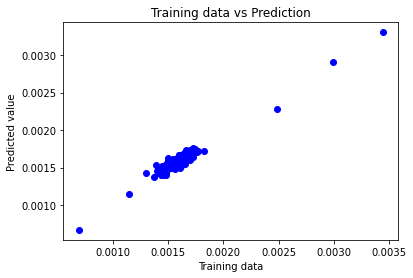

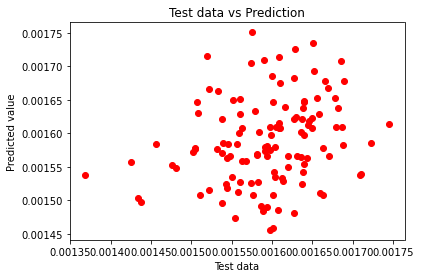

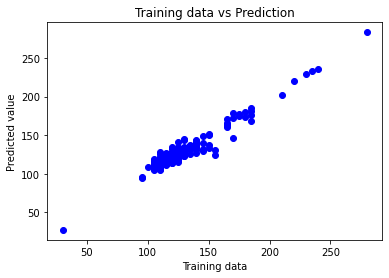

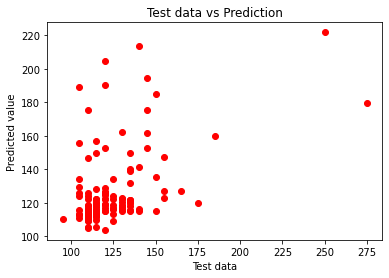

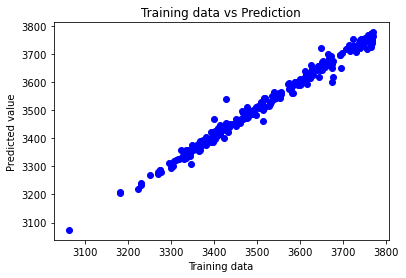

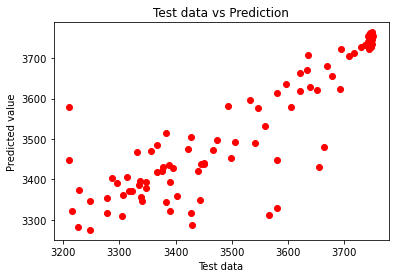

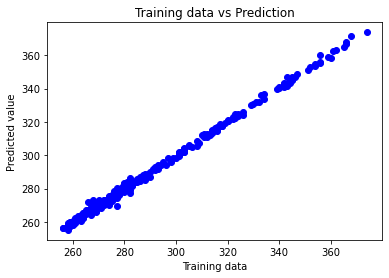

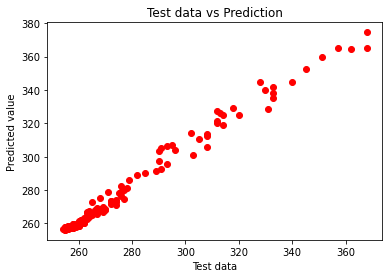

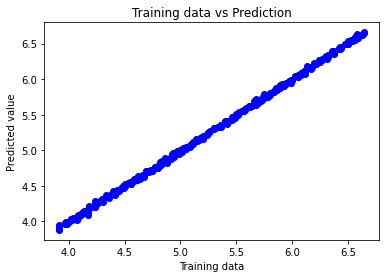

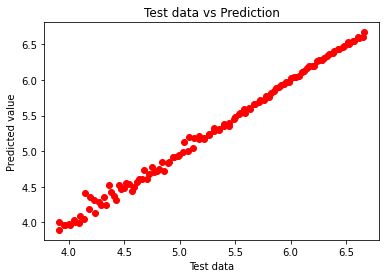

In [12]:
for i in range(num_digits):
    plt.scatter(y_train[:,i], y_pred_train[:,i], c='b');
    plt.xlabel('Training data')
    plt.ylabel('Predicted value')
    plt.title('Training data vs Prediction')
    plt.show()
    plt.scatter(y_test[:,i], y_pred_test[:,i], c='r');
    plt.xlabel('Test data')
    plt.ylabel('Predicted value')
    plt.title('Test data vs Prediction')
    plt.show()
